In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn

data_path = './../../data/processed/'

import numpy as np

In [4]:
# for col in ['CN ID 4', 'CN ID 8', 'VAT']:
col = 'CN ID 4'
df = pd.read_csv(data_path + col.replace(' ', '_')+'_FY.csv')
df = df.loc[df.YEAR > 2010]
df = df.loc[df.ID.isin(np.random.choice(df.ID.unique(), 100000))]
df = df.groupby(['ID', 'IMPORT', col])[['VART']].sum().reset_index() #ignore year

In [6]:
df

,ID,IMPORT,CN ID 4,VART
0,215,0,7318,7460
1,413,0,901,14968
2,413,0,4415,1372
3,413,0,4901,55
4,413,0,4911,62
5,413,0,7318,569
6,413,0,8418,580
7,413,0,8419,14372148
8,413,0,8420,2783
9,413,0,8438,2100439


In [ ]:
import numpy as np

In [167]:
for col in ['CN ID 4', 'PYOD', 'VAT']:
    df = pd.read_csv(data_path + col.replace(' ', '_')+'_FY.csv')
    df = df.loc[df.YEAR > 2010]
    df = df.loc[df.ID.isin(np.random.choice(df.ID.unique(), 100000))]
    df = df.groupby(['ID', 'IMPORT', col])[['VART']].sum().reset_index() #ignore year
#     df['date'] = pd.DatetimeIndex(pd.to_datetime(df.YEAR - 1997, unit='Y', origin=pd.Timestamp('1996-12-15'))).round('D')
    
    n_prods = df.groupby(['IMPORT','ID'])[[col]].nunique().unstack(0)
#     n_prods.index = pd.date_range(sy+'-01-01', '2013-12-31', freq = 'M')

    fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = False)
    fig.suptitle('Effective nunique '+col, fontsize=12)
    
    for i in [1, 0]:
        ax = axs[i]

        if (i == 1 and col == 'VAT'): pass
        else:

            # Distribution within firms (ID) (ex prod month)
            wn_ID_distrib = df.loc[df.IMPORT == i].groupby([col, 'ID'])[['VART']].sum().reset_index()
            wn_ID_distrib['rank'] = wn_ID_distrib.groupby('ID')['VART'].apply(lambda x: x.rank(ascending = False, method = 'first'))

            wn_ID_distrib = wn_ID_distrib.sort_values(by = ['ID', 'rank'])
            wn_ID_distrib['cs_VART'] = wn_ID_distrib.groupby('ID')[['VART']].apply(lambda x: x.cumsum())

            wn_ID_distrib['pdf_ID'] = wn_ID_distrib.groupby('ID')[['VART']].apply(lambda x: x / float(x.sum()))
            wn_ID_distrib['cdf_ID'] = wn_ID_distrib.groupby('ID')[['cs_VART']].apply(lambda x: x / float(x.max()))

            ax.plot(n_prods[col][i].sort_values(ascending = False).reset_index(drop = 'True'), marker = '.', lw = 0)

            for cut in [.9, .99, .999]:
                effective_nunique = wn_ID_distrib.loc[wn_ID_distrib.cdf_ID < cut].groupby('ID')[col].count()
                effective_nunique = effective_nunique.sort_values(ascending = False)
                ax.plot(effective_nunique.reset_index(drop = 'True'), marker = '.', lw = 0)

            ax.set_yscale('log')
            ax.set_xscale('log')
    #         ax.set_ylim(0,)
            # plt.legend(['Exports', 'Imports'])
    plt.show()

KeyboardInterrupt: 

In [161]:
nunique_cols = []
for cut in [.9, .99, .999]:
    effective_nunique = wn_ID_distrib.loc[wn_ID_distrib.cdf_ID < cut].groupby('ID')[[col]].count()
    effective_nunique.columns = [cut]
    nunique_cols += [effective_nunique]
    
effective_nunique = pd.concat(nunique_cols, axis = 1)

nunique = wn_ID_distrib.groupby('ID')[[col]].nunique()
nunique.columns = ['nunique']

ID_sum = wn_ID_distrib.groupby('ID')[['VART']].sum()

effective_divers = pd.concat([ID_sum, nunique, effective_nunique], axis = 1).fillna(1).astype(int)

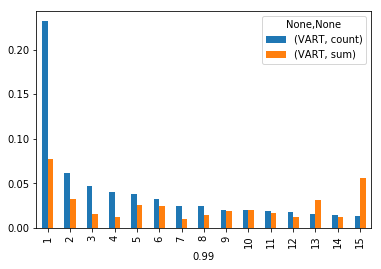

In [4]:
import numpy as np

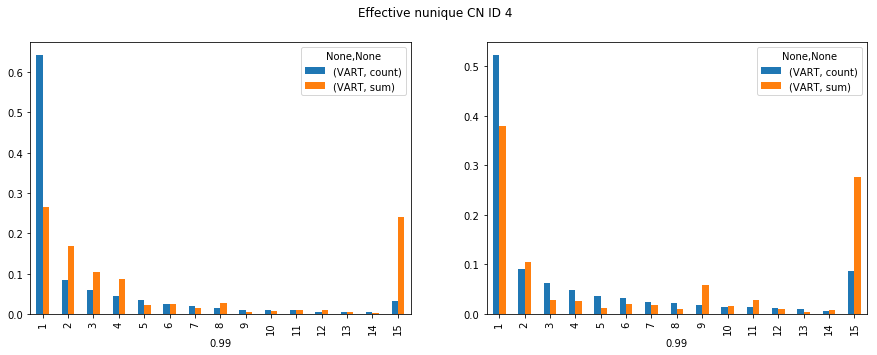

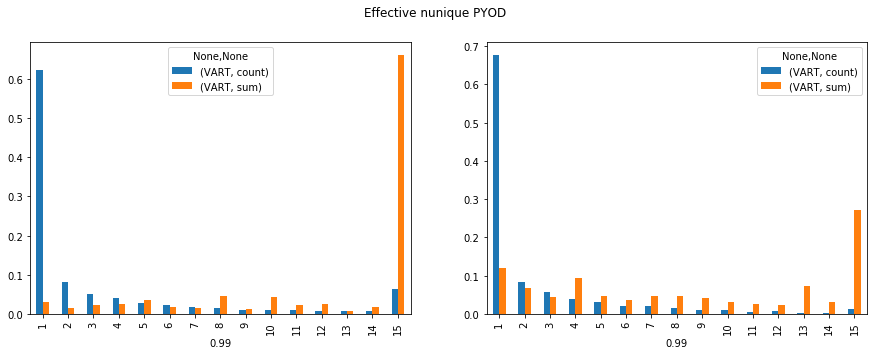

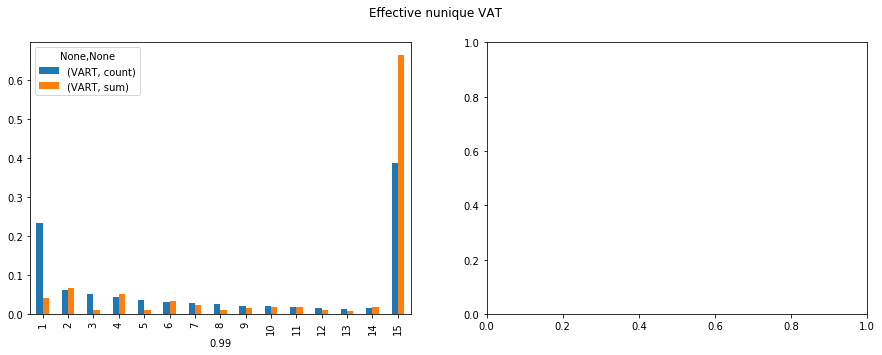

In [16]:
for j, col in enumerate(['CN ID 4', 'PYOD', 'VAT']):
    df = pd.read_csv(data_path + col.replace(' ', '_')+'_FY.csv')
    df = df.loc[df.YEAR > 2010]
    df = df.loc[df.ID.isin(np.random.choice(df.ID.unique(), 10000))]
    df = df.groupby(['ID', 'IMPORT', col])[['VART']].sum().reset_index() #ignore year
    
    n_prods = df.groupby(['IMPORT','ID'])[[col]].nunique().unstack(0)

    fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = False)
    fig.suptitle('Effective nunique '+col, fontsize=12)
    
    for i in [1, 0]:
        ax = axs[i]

        if (i == 1 and col == 'VAT'): pass
        else:

            # Distribution within firms (ID) (ex prod month)
            wn_ID_distrib = df.loc[df.IMPORT == i].groupby([col, 'ID'])[['VART']].sum().reset_index()
            wn_ID_distrib['rank'] = wn_ID_distrib.groupby('ID')['VART'].apply(lambda x: x.rank(ascending = False, method = 'first'))

            wn_ID_distrib = wn_ID_distrib.sort_values(by = ['ID', 'rank'])
            wn_ID_distrib['cs_VART'] = wn_ID_distrib.groupby('ID')[['VART']].apply(lambda x: x.cumsum())

            wn_ID_distrib['pdf_ID'] = wn_ID_distrib.groupby('ID')[['VART']].apply(lambda x: x / float(x.sum()))
            wn_ID_distrib['cdf_ID'] = wn_ID_distrib.groupby('ID')[['cs_VART']].apply(lambda x: x / float(x.max()))

            nunique_cols = []
            for cut in [.9, .99, .999]:
                effective_nunique = wn_ID_distrib.loc[wn_ID_distrib.cdf_ID < cut].groupby('ID')[[col]].count()
                effective_nunique.columns = [cut]
                nunique_cols += [effective_nunique]

            effective_nunique = pd.concat(nunique_cols, axis = 1)
            nunique = wn_ID_distrib.groupby('ID')[[col]].nunique(); nunique.columns = ['nunique']
            ID_sum = wn_ID_distrib.groupby('ID')[['VART']].sum()

            clip = [15, 30, 30][j]
            effective_divers = pd.concat([ID_sum, nunique.clip(0, clip), effective_nunique.clip(0, clip)], axis = 1).fillna(1).astype(int)
            
            distrib_of_nunique = effective_divers.groupby(0.99)[['VART']].agg(['count', 'sum'])
            distrib_of_nunique = distrib_of_nunique/distrib_of_nunique.sum()
            distrib_of_nunique.plot(kind = 'bar', ax = ax)

    plt.show()

In [91]:
import seaborn as sns
data

,VAT,ID,VART,rank,cs_VART,pdf_ID,cdf_ID
442972,IT9000010,3524,70109,1.0,70109,0.518558,0.518558
402420,IT0324907,3524,26936,2.0,97045,0.199231,0.717788
366970,IT0078211,3524,19569,3.0,116614,0.144741,0.862530
342874,GB8000012,3524,6727,4.0,123341,0.049756,0.912286
361515,IT0036329,3524,5359,5.0,128700,0.039638,0.951923
441837,IT0572688,3524,2716,6.0,131416,0.020089,0.972012
441411,IT0569828,3524,1214,7.0,132630,0.008979,0.980991
210067,DE8000023,3524,772,8.0,133402,0.005710,0.986701
364708,IT0061977,3524,745,9.0,134147,0.005510,0.992212
390830,IT0248379,3524,745,10.0,134892,0.005510,0.997722


/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


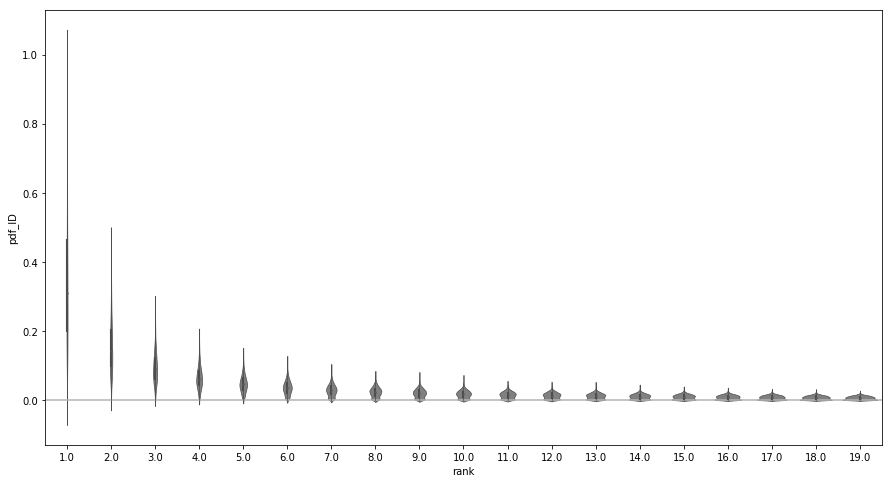

In [124]:
# n = 5
select_firms = effective_divers.loc[effective_divers[0.999] > n].index.values
data = wn_ID_distrib.loc[wn_ID_distrib.ID.isin(select_firms)]
data = data.loc[data['rank'] < 20]#.sample(10000)
# data['pdf_ID'] = data['pdf_ID']*data['rank']
# data['pdf_ID'] = 1/data['pdf_ID']

fig, ax = plt.subplots(1, figsize = (15, 8))
ax.axhline(0, c = '.7')
ax = sns.violinplot(x="rank", y="pdf_ID", data=data, bw = .2, linewidth = .7, color = '.5')
# ax.set_ylim(0, 1000)
# ax.set_yscale()
plt.show()

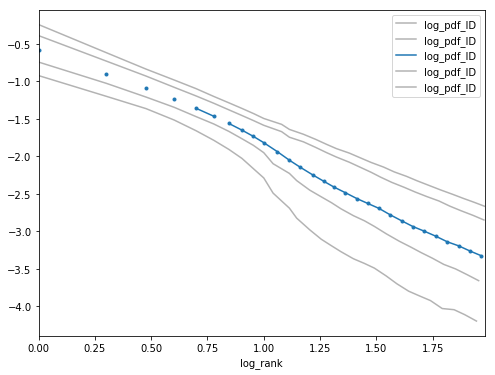

In [165]:
fig, ax = plt.subplots(1, figsize = (8, 6))

select_firms = effective_divers.loc[effective_divers[0.999] > 10].index.values
data = wn_ID_distrib.loc[wn_ID_distrib.ID.isin(select_firms)]
data = data.loc[data['rank'] < 100]#.sample(10000)
data['log_rank'] = np.log10(data['rank'])
data['log_rank_bin'] = pd.cut(data['log_rank'], np.arange(-.01, 2, 0.05))
data['log_pdf_ID'] = np.log10(data['pdf_ID'])

gpr = 'log_rank_bin'
grouped = data.groupby(gpr)[['log_rank', 'log_pdf_ID']]
grouped.quantile(.9).dropna().plot(x = 'log_rank', y = 'log_pdf_ID', c = '.7', ax = ax)
grouped.quantile(.75).dropna().plot(x = 'log_rank', y = 'log_pdf_ID', c = '.7', ax = ax)
grouped.mean().plot(x = 'log_rank', y = 'log_pdf_ID', marker = '.', ax = ax)
grouped.quantile(.25).dropna().plot(x = 'log_rank', y = 'log_pdf_ID', c = '.7', ax = ax)
grouped.quantile(.1).dropna().plot(x = 'log_rank', y = 'log_pdf_ID', c = '.7', ax = ax)

plt.show()

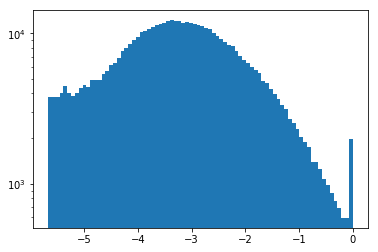

In [76]:
plt.hist(sorted(np.log10(wn_ID_distrib['pdf_ID']).replace(-np.inf, np.nan).dropna().values)[-500000:], 80)
plt.yscale('log')
# plt.ylim(1e2, 2e4)
plt.show()

In [74]:
np.power(10, -.2)

0.6309573444801932